In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2 , VGG19, InceptionV3
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.callbacks import ModelCheckpoint

In [80]:
train_dir = '../input/yoga-poses-dataset/DATASET/TRAIN' 
test_dir = '../input/yoga-poses-dataset/DATASET/TEST' 

In [81]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [82]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [83]:
train_data =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
test_data  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [90]:
model = tf.keras.Sequential()
model.add(InceptionResNetV2(include_top = False,weights = 'imagenet',input_shape= (224,224,3)))
model.add(Flatten())
model.add(Dense(5,activation = 'softmax'))

In [91]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 38400)             0         
                                                                 
 dense_18 (Dense)            (None, 5)                 192005    
                                                                 
Total params: 54,528,741
Trainable params: 54,468,197
Non-trainable params: 60,544
_________________________________________________________________


In [120]:
optimizer = Adam(lr = 0.0001)

model.compile(optimizer = 'rmsprop',loss = "categorical_crossentropy",metrics = ['accuracy'])
epochs = 25
batch_size = 16

In [121]:
# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint('inception_resnet_v2.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [123]:
history = model.fit(train_data,epochs = epochs,validation_data = test_data,callbacks=[checkpoint])

Epoch 1/25
55/55 [==============================] - ETA: 0s - loss: 0.8113 - accuracy: 0.8164
Epoch 1: val_accuracy improved from -inf to 0.63043, saving model to inception_resnet_v2.h5
55/55 [==============================] - 43s 783ms/step - loss: 0.8113 - accuracy: 0.8164 - val_loss: 531.5710 - val_accuracy: 0.6304
Epoch 2/25
55/55 [==============================] - ETA: 0s - loss: 0.7874 - accuracy: 0.8580
Epoch 2: val_accuracy improved from 0.63043 to 0.65217, saving model to inception_resnet_v2.h5
55/55 [==============================] - 37s 667ms/step - loss: 0.7874 - accuracy: 0.8580 - val_loss: 77.1017 - val_accuracy: 0.6522
Epoch 3/25
55/55 [==============================] - ETA: 0s - loss: 0.6157 - accuracy: 0.8834
Epoch 3: val_accuracy improved from 0.65217 to 0.86957, saving model to inception_resnet_v2.h5
55/55 [==============================] - 37s 661ms/step - loss: 0.6157 - accuracy: 0.8834 - val_loss: 1.4477 - val_accuracy: 0.8696
Epoch 4/25
55/55 [===================

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import load_model

def predict_and_show(image_path, model):
    # Define a list of category names
    category_names = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
    
    # Load the image and convert it to a numpy array
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalize the image data
    img_array /= 255.
    
    # Make the prediction
    prediction = model.predict(img_array)
    
    # Get the predicted class index and category name
    class_index = np.argmax(prediction)
    predicted_category = category_names[class_index]
    
    # Show the image with the predicted category as the title
    plt.imshow(img)
    plt.title(predicted_category)
    plt.show()


1/1 [==============================] - 4s 4s/step


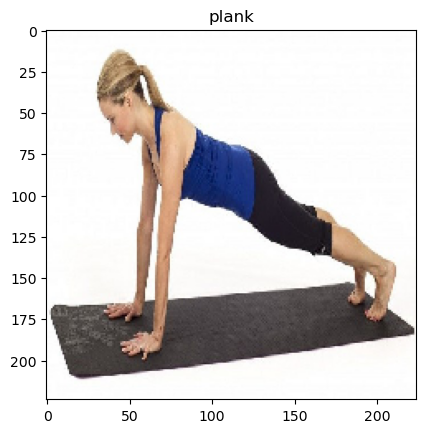

In [138]:
model = load_model('/kaggle/working/inception_resnet_v2.h5')
image_path = '/kaggle/input/yoga-poses-dataset/DATASET/TEST/plank/00000001.jpg'
predict_and_show(image_path, model)

1/1 [==============================] - 4s 4s/step


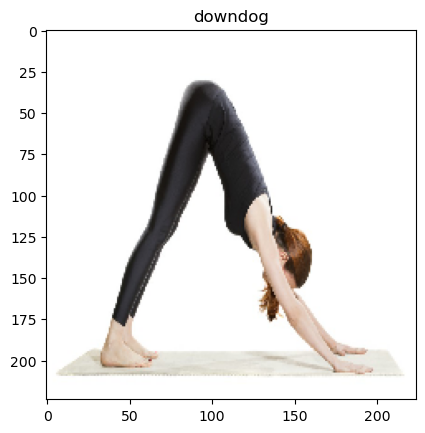

In [140]:
model = load_model('/kaggle/working/inception_resnet_v2.h5')
image_path = '/kaggle/input/yoga-poses-dataset/DATASET/TEST/downdog/00000011.jpg'
predict_and_show(image_path, model)

1/1 [==============================] - 3s 3s/step


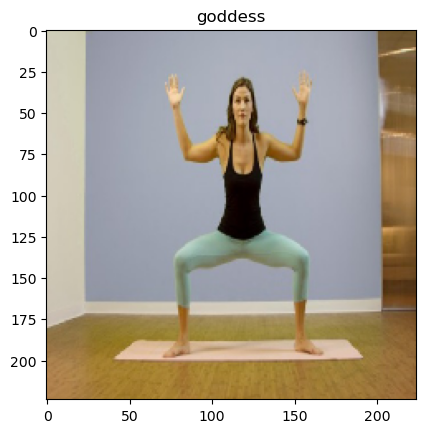

In [141]:
model = load_model('/kaggle/working/inception_resnet_v2.h5')
image_path = '/kaggle/input/yoga-poses-dataset/DATASET/TEST/goddess/00000005.jpg'
predict_and_show(image_path, model)